### Analyse some twitter feeds trought streaming api

In [1]:
# Import very handy library for twitter analysis
import tweepy

In [2]:
# Set the necessary OAuth credentials for the app (anonymized :)
access_token = ''
access_token_secret = ''
consumer_key = ''
consumer_secret = ''

In [3]:
# Initialize the tweepy handler with the OAuth details
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
# Import naive stream listener
from twitter_listener import TwitterStreamListener
listener = TwitterStreamListener(number_of_tweets=10000)

In [5]:
# Create tweepy stream with authentication
stream = tweepy.Stream(auth, listener)

In [6]:
# Filter some keywords
stream.filter(track=['trump', 'drugs', 'terrorists', 'hurricane'])

In [7]:
# Create a list with the tweets
import json
tweets_data = list()
with open('tweets.txt', 'r') as tweets_file:
    for line in tweets_file:
        tweet = json.loads(line)
        tweets_data.append(tweet)

In [8]:
# Create a data frame for simple usage
import pandas as pd
df = pd.DataFrame(tweets_data, columns=['text','lang'])

In [15]:
# Count the occurences
import re

def word_in_text(word, text):
    word = word.lower()
    text = str(tweet).lower()
    match = re.search(word, text)

    if match:
        return True
    return False

[trump, drugs, terrorists, hurricane] = [0, 0, 0, 0]
for index, row in df.iterrows():
    trump += word_in_text('trump', row['text'])
    drugs += word_in_text('drugs', row['text'])
    terrorists += word_in_text('terrorists', row['text'])
    hurricane += word_in_text('hurricane', row['text'])

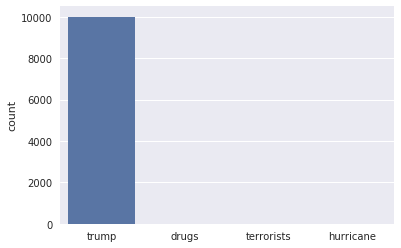

In [18]:
# Draw a simple bar chart
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes = True)
labels = ['trump', 'drugs', 'terrorists', 'hurricane']
ax = sns.barplot(labels, [trump, drugs, terrorists, hurricane])
ax.set(ylabel="count")
plt.show()